<h1><center>Air Quality of Boston</center></h1>

<div>
<img src="https://media.wbur.org/wp/2021/07/0726_smoke-01-1000x596.jpg" width="500"/>
</div>

<center> Photo by WBUR<sup>[1]</sup></center>

## **1. Problem Statement**

Air pollution is contamination of the environment by any physical, chemical, or biological agent that changes the atmosphere's natural characteristics ([World Health Organization](https://www.who.int/health-topics/air-pollution#tab=tab_1)). Air pollution can cause both short-term and long-term effects. Temporary short-term effects can cause illnesses (i.e., pneumonia, bronchitis), irritation to the throat, eyes or headaches, dizziness, and nausea. Otherwise, long-term effects can endure for years. Long-term health effects of air pollution are illnesses (i.e., heart disease, lung cancer), damage to human nerves, brain, and other organs, and also causing congenital disabilities. Each year almost 2.5 million people die worldwide because of air pollution ([National Geographic](https://education.nationalgeographic.org/resource/air-pollution)).
    
The Air Quality Index, the concentration of pollutants in the air in a specific place, is accepted as an indicator of air pollution. The higher the AQI value means, the greater the level of air pollution and the more considerable the health concern. Air Quality Index ranks on a scale from 0 to 500 and levels into five categories. Air Quality Index is calculated daily depending on various parameters. One of these parameters is atmospheric particulate matters 2.5 (PM$_{2.5}$), which are tiny particles of solid or liquid suspended in a gas. 2.5 refers to the diameter of particles which is 2.5 microns or less. Since PM$_{2.5}$ are smaller, PM$_{2.5}$  can be transferred to longer distances. Therefore the level of PM$_{2.5}$ is noteworthy to human health ([Morillas et al., 2019](https://www.sciencedirect.com/science/article/pii/S0959652619311400?via%3Dihub)). 

Forecasting air quality is essential for reducing the damage caused by air pollution to human health. Also, monitoring and forecasting of air quality have become an increasingly popular topic in artificial intelligence (AI) technology ([Zhang, Zeng & Yan, 2021](https://link.springer.com/article/10.1007/s11356-021-12657-8)). By forecasting air quality,  authorities can take precautions and issue early warnings to reduce the impacts of air pollution. Consequently, I aim to build a time series model to forecast the air quality of Boston, the capital and largest city in Massachusetts in the USA, for 2023. 

## 2. **Datasets**

[Repo for Data Sets](https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/tree/main/data)

**i. Air Quality Data:** 
<p style='text-align: justify;'>This data is the daily average air quality of Boston Station. The data was downloaded as a CSV file from the Air Quality Historical Data Platform [link](https://aqicn.org/data-platform/register/). I read data from July 2014 to February 2022. This data contains five parameters of the air quality index: PM25, O3, NO2, SO2, and CO.</p>

**ii. Weather:** 
<p style='text-align: justify;'>The weather can significantly impact air quality since different aspects of the weather affect the amounts of ozone and particulates present in a specific area. For example, sunshine, rain, higher temperatures, wind speed, air turbulence, and mixing depths affect pollutant concentrations. Therefore, I gathered the weather data for Boston.</p>

<p style='text-align: justify;'>The weather data of Boston was retrieved from visialcrossing.com [website](https://www.visualcrossing.com/weather/weather-data-services). The weather data can be downloaded in different formats (JSON, API, CSV) and units (hourly, Celcius, etc.). I downloaded daily weather data from January to up-to-date in CSV format. There are 33 attributes (temperature, humidity, wind, etc.) for weather data.</p>

**iii. Energy Consumption:**
<p style='text-align: justify;'>SSince air pollution is strongly related to energy production and consumption, I gathered different energy consumption data. US Energy Information Administration shares independent and impartial energy information. I took two datasets:</p>

* *The Natural Gas Delivered to Consumers in Massachusetts (Including Vehicle Fuel)* [link](https://www.eia.gov/dnav/ng/hist/n3060ma2m.htm): Monthly level data, XLS file format, from 2001 to 2022, Million Cubic Feet.
* *Massachusetts Total Gasoline All Sales per Deliveries by Prime_Supplier* [link](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=C100011251&f=M): Monthly level data, XLS file format, from 1983 to 2022, Thousands of Gallons

**iv. Flight Number:**
<p style='text-align: justify;'>Massachusetts has eight airports, and Boston Logan International Airport is the biggest one. Logan Airport publishes statistics based on the airlines' monthly information</p> 
[website](https://www.massport.com/logan-airport/about-logan/airport-statistics/). Each month's report is in PDF format. I gathered each month's total airport flight number (domestic and international) in a spreadsheet from 2014 to 2021.

**v. Population**
<p style='text-align: justify;'> The United States Census Bureau publishes the population of the USA officially. Unfortunately, I can not use the population data of the Census Bureau data because there is no data for 2021. Therefore, I got the population of Boston taken from another source [website](https://worldpopulationreview.com/us-cities/boston-ma-population). Note that 2021's population data is projected. The data is in CSV format.</p>

**vi. Federal Highway Administration's Reports**
<p style='text-align: justify;'>Office of Highway Policy Information publishes reports containing analyzed statistical information on traffic as motor fuel, highway mileage, travel, etc. I took two datasets:</p>

* *Traffic Volume Trends* [link](https://www.fhwa.dot.gov/policyinformation/travel_monitoring/tvt.cfm) is one of them, which is a monthly report based on hourly traffic count data reported by the States. Estimated travel (in billion vehicle miles) on all roads and streets in Massachusetts are reported. The report is published monthly in PDF and EXCEL format. I gathered data in a spreadsheet from 2014 to 2021.

* *Monthly Motor Fuel Reports [link](https://www.fhwa.dot.gov/policyinformation/motorfuelhwy_trustfund.cfm)*: 
Each State reports the amount of gallons taxed by that state to the Federal Highway Administration. I took monthly special fuel and gasoline consumption (in gallons) from these reports. The report is published monthly in PDF and EXCEL format. In addition, I gathered data in a spreadsheet from 2014 to 2021.

## 3. **Data Cleaning and Data Wrangling**

[Data Wrangling Notebook](https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/blob/main/notebooks/data_wrangling.ipynb)

**i. Air Quality Data:**
<p style='text-align: justify;'> Several dates are missing in the data. I added these dates to the date range they should be and set parameters values as NaN. Types of variables are corrected. I decided to use PM$_{2.5}$ as the air quality parameter. The reason is that there are fewer NaNs compared to other parameters. Also, according to the WHO, PM is the common indicator of air pollution and affects human health more than other pollutants. Null values are imputed linearly.</p>

**ii. Weather:**
<p style='text-align: justify;'> In weather data, there are 34 columns. Some columns have more than %95 null values, and some are irrelevant. A total of 14 columns were dropped. Variable types are checked and corrected. Null values are imputed linearly.</p>

**iii. Energy Consumption:**
<p style='text-align: justify;'> I merged two dataframe, one related to natural gas and the other related to total gasoline all sales. Variable types are checked and corrected. There are no nulls.</p>

**iv. Flight Number and Population:**
<p style='text-align: justify;'> Variable types are checked and corrected. There are no nulls.</p>

**vi. Federal Highway Administration's Reports:** 
<p style='text-align: justify;'> Variable types are checked and corrected. There is no data for December 2021 because the report wasn't published then. I added the average of 11 months of 2021 to December 2022.</p>

<p style='text-align: justify;'> I merged all dataframes into a single dataframe. As a result, there are 33 daily level attributes ready for EDA.</p>

## 4.  **Exploratary Data Analysis**

[EDA notebook](https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/blob/main/notebooks/exploratory_data_analysis.ipynb)

<p style='text-align: justify;'> As seen in Figure 1, there are changes in PM$_{2.5}$  during the year. There is no apparent trend in the data over this period. As years progress, PM 2.5  neither increase nor decrease overall, but there are changes during the year. There is an intuition about seasonality and seasonality by monthly analysis.</p>

![grab-landing-page](https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/raw/main/media/final_62edd3be4898050088e04ad8_41858.gif)
<center> Figure 1. Changes in PM$_{2.5}$ between 2014 and 2021 </center>

<p style='text-align: justify;'> It can be said that there is yearly seasonality in PM$_{2.5}$ values according to the statistics of the months without considering the years separately. The average of PM$_{2.5}$ in January ($\overline{x}=45.21$) and February ($\overline{x}=45.98$) is higher than other months. As expected, there is an increase in the PM$_{2.5}$ level in the last two months of the year. In November ($\overline{x}=41.08$) and February ($\overline{x}=42.32$), the average is not as high as in the first two months. There is an increase in July ($\overline{x}=43.21$). It could be related to the hot temperature. Contrary to this,  Although the air temperature is low in winter, there is no decrease in PM$_{2.5}$ level. There must be another reason for the winter's high-level PM$_{2.5}$. Also, there is a remarkable decrease in average after February (11.7%), March (15.5%), and June (8.6%).</p>

<div>
<img src="https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/raw/main/media/fig%202..png" width="500"/>
</div>
<center> Figure 2. Monthly average of PM$_{2.5}$ </center>

<p style='text-align: justify;'> As seen in Figure 3, the data from each year has an almost similar trend. The trend can be explained as there is a decrease in spring, an increase in summer, a decrease again in autumn, and an increase in winter. Some years show different behavior in some seasons. For instance, the average of November is higher than December in 2014 and 2019, but it is vice versa in other years. Also, 2020 and 2021 have the lowest PM$_{2.5}$ values, which could be related to Covid-19 restrictions</p>

<div>
<img src="https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/raw/main/media/fig%203..png" width="800" height="400"/>
</div>
<center> Figure 3.Seasonal Plot of PM$_{2.5}$ </center>

<p style='text-align: justify;'> There is no strong correlation between PM$_{2.5}$ and exogenous variables at the daily, monthly, and quarterly levels. However, there are some strong correlations between PM$_{2.5}$ and other variables at the annual and semi-annual levels. For example,  PM$_{2.5}$ has a positive relationship (r > .5) with humidity, gasoline, number of flights, and a negative correlation with temperature and visibility.</p>

## 5. **Algorithms & Machine Learning**

### **5.1. Univariate Time Series Models**

[ML Notebook](https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/blob/main/notebooks/univarite_models.ipynb)

I tested several univariate time series models:

* Naive, Seasonal Naive, Simple Average as simple methods
* Simple Exponential Smoothing, Holt-Winters, 
* ARMA, ARIMA, SARIMA, 
* FbProphet, 
* PyCaret
* LSTM. 

<p style='text-align: justify;'> Also, I used cross-validation and hypermeter tuning to evaluate the performance of ARIMA, SARIMA, and FbProphet models. </p>
    
<p style='text-align: justify;'> I used Mean Absolute Percentage Error (MAPE) for evaluating model performance. The advantages of MAPE are its scale-independency and easy interpretability. I used MAPE to compare the outcome of multiple time series models with different scales. One disadvantage of MAPE is a heavier penalty for negative than positive errors, but I don't have any negative PM2.5 value. </p>

[The document](https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/raw/main/notebooks/report%20for%20univariate%20time%20series.pdf) shows the details of the univariate models I used. 


### **5.2. Multivariate Time Series Models**


[ML Notebook]()

<p style='text-align: justify;'> Before building multivariate models, the exogenous features must be selected. First, I created lags of daily exogenous features. Then, I performed two different methods to determine and generate feature sets. One method for feature selection is Random Forest Regression, and the other is  Stepwise Regression - Backwards elimination approach. After all, I created seven different feature sets for multivariate models.</p>

I tested several multivarite time series models with different feature sets: 
* ARIMA, 
* SARIMA
* FbProphet
* PyCaret

[The document](https://github.com/hangulde/Air_Quality_Prediction_of_Boston-/raw/main/notebooks/report%20for%20multivariate%20time%20series.pdf) shows the details of the univariate models I used. 

## 5.3 Winner Model and Forecasting

I have tested both univariate and multivariate models for prediction of PM$_{2.5}$. 

<p style='text-align: justify;'>  SARIMA model with order = (1,2,2) and seasonal order = (1,1,0,12) gave the least MAPE (.98) so that is the champion model. The challenger models are Holt Winter’s Exponential Smoothing, tuned univariate FbProphet and ARIMAX. These challenger models' MAPE is so close to winner model's MAPE. I used to SARIMA for forecasting the first three months in 2022 (Figure 4).</p>

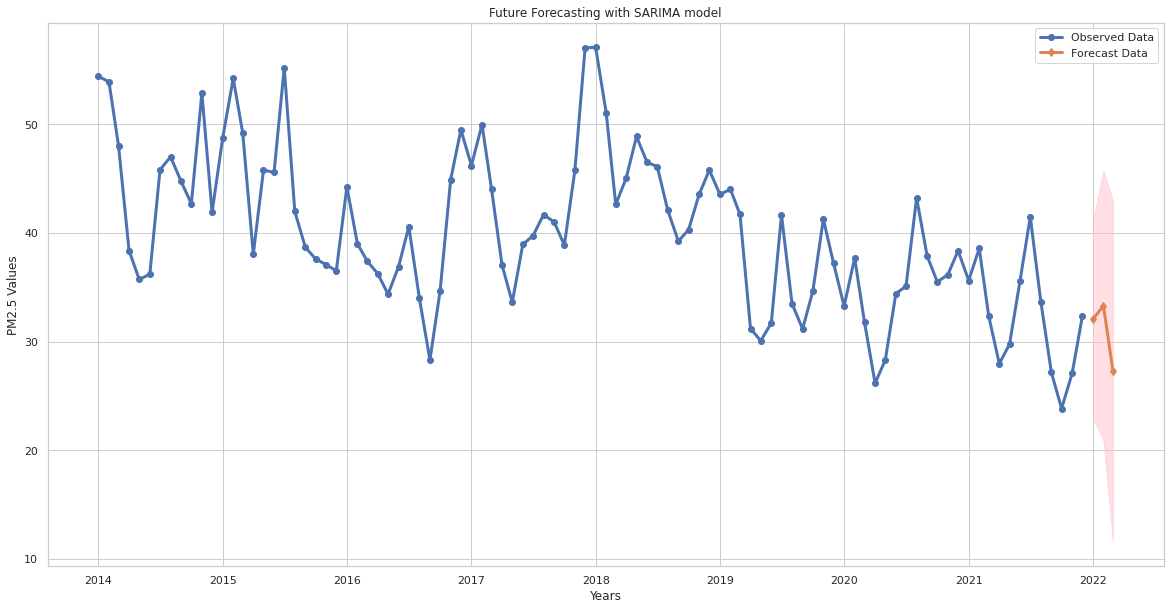
<center> Figure 4.Forecasting of PM$_{2.5}$ with SARIMA Model </center>



## 5.4 Future Improvements

In this project, I aimed to build a model for forecasting the air quality of Boston.  
The PM$_{2.5}$ value was forecasted for the first three months of 2022. Now, I have the actual data of these months. For each month, the performance of champion and challenger models' performance could be assess. These models could be re-trained with new actual data and be used for forecasting. 

* There is a dramatic decrease in PM$_{2.5}$ concentration in last two years because of  Covid-19 pandemic. Revising best models with actual 2022 data could better for improving models and  decreasing the error. 

* Multivariate time series model could't perform as good as univariate models. Also, feature selection process showed that some exogenius features have not important for forecasting PM$_{2.5}$. Therefore, in future studies different features such as wild fires could be examined for multivariate models. 

* In this project, air quality index is presented in city level though it can be differ in different regions. Similarly some exogenous variables such as wind and humidity can be diverge in different part of city. Therefore multivariate models may not have performed as well as expected. In future studies, multivariate models could be build with the data taken from stations much closer to each other.


# References
[1] https://www.wbur.org/radioboston/2021/07/27/wildfires-trigger-air-quality-alerts-in-massachusetts

# Credits

Thanks to Ajith Patnaik for being an amazing mentor with his support, guidance, and advices. 